creating the dataset

In [1]:
import pandas as pd
import random

# Create an empty DataFrame
data = pd.DataFrame(columns=[
    'CustomerID', 'Gender', 'Age', 'ServiceLength (months)',
    'ContractType', 'MonthlyCharges (USD)', 'TotalCharges (USD)', 'Churn'
])

# Generate 1000 customer records
for i in range(1000):
    customer_id = 1000 + i
    gender = random.choice(['Male', 'Female'])
    age = random.randint(18, 80)
    service_length = random.randint(1, 60)
    contract_type = random.choice(['Two-Year', 'One-Year', 'Month-to-Month'])
    monthly_charges = round(random.uniform(20, 200), 2)
    total_charges = round(monthly_charges * service_length, 2)
    churn = random.choice(['Yes', 'No'])

    data.loc[i] = [customer_id, gender, age, service_length, contract_type, monthly_charges, total_charges, churn]

# Save the generated dataset to a CSV file
data.to_csv('CommLink_Telecom_Customer_Data.csv', index=False)


Step 1: Data Cleaning

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('CommLink_Telecom_Customer_Data.csv')

# Handle missing values
data.dropna(inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)

Step 2: Data Preprocessing

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['ContractType'] = encoder.fit_transform(data['ContractType'])

# Feature scaling
scaler = StandardScaler()
data[['Age', 'ServiceLength (months)', 'MonthlyCharges (USD)', 'TotalCharges (USD)']] = scaler.fit_transform(data[['Age', 'ServiceLength (months)', 'MonthlyCharges (USD)', 'TotalCharges (USD)']])

Step 3: Exploratory Data Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              1000 non-null   int64  
 1   Gender                  1000 non-null   object 
 2   Age                     1000 non-null   int64  
 3   ServiceLength (months)  1000 non-null   int64  
 4   ContractType            1000 non-null   object 
 5   MonthlyCharges (USD)    1000 non-null   float64
 6   TotalCharges (USD)      1000 non-null   float64
 7   Churn                   1000 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB
None
        CustomerID          Age  ServiceLength (months)  MonthlyCharges (USD)  \
count  1000.000000  1000.000000              1000.00000           1000.000000   
mean   1499.500000    50.459000                30.62600            110.731520   
std     288.819436    18.376562                17.1659

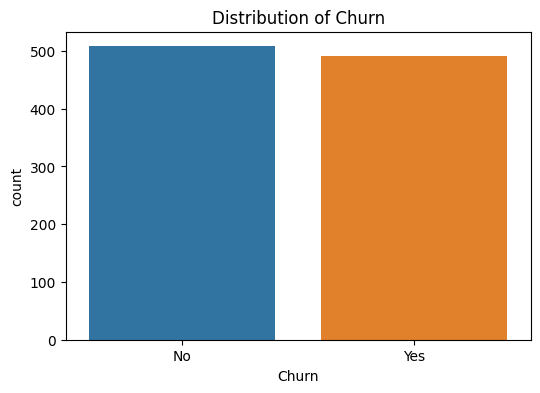

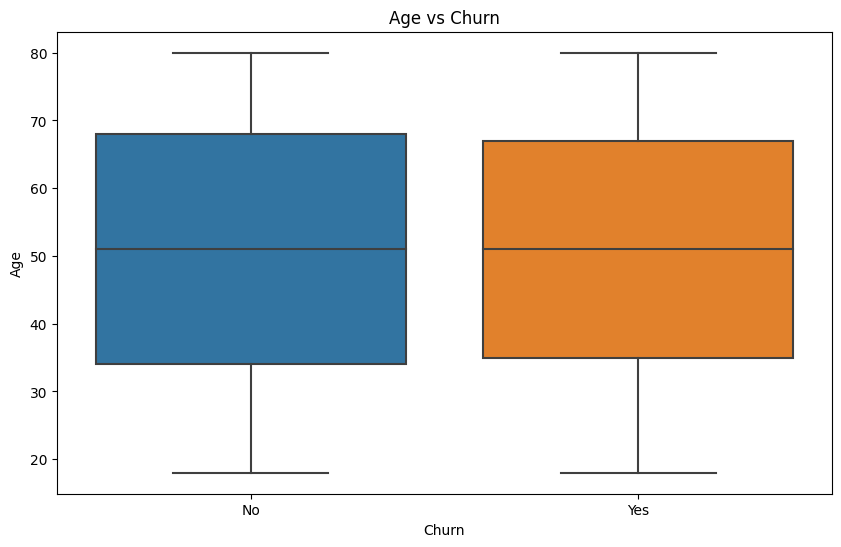

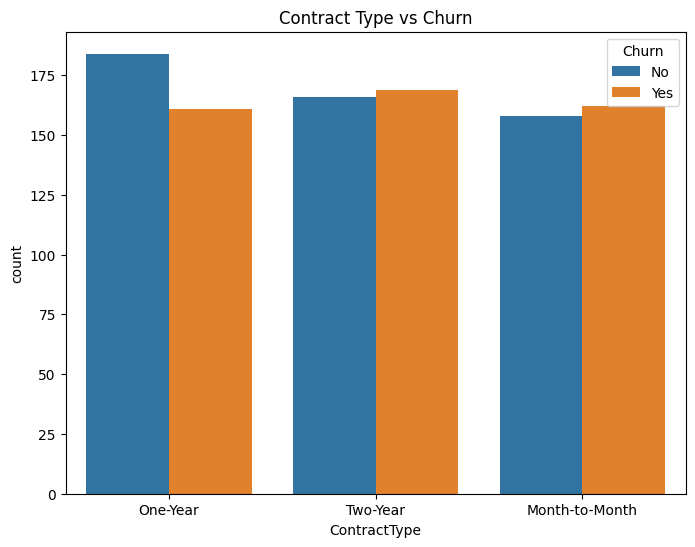

<ipython-input-4-e20c9c7856b3>:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


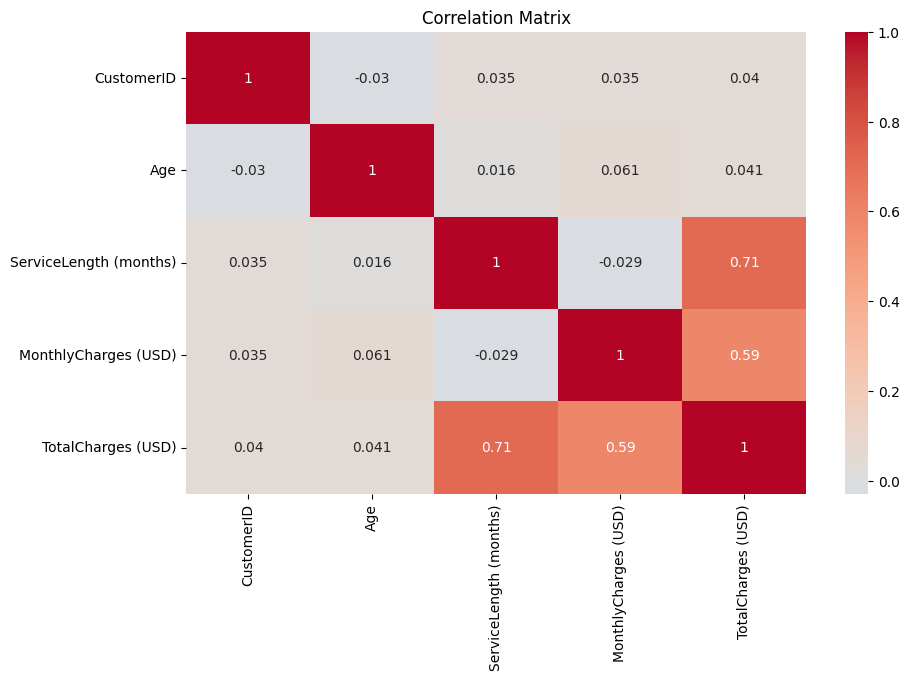

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('CommLink_Telecom_Customer_Data.csv')

# Display basic information about the dataset
print(data.info())

# Display summary statistics
print(data.describe())

# Visualize the distribution of Churn
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Churn')
plt.title('Distribution of Churn')
plt.show()

# Visualize the relationship between Age and Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Churn', y='Age')
plt.title('Age vs Churn')
plt.show()

# Visualize the relationship between ContractType and Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='ContractType', hue='Churn')
plt.title('Contract Type vs Churn')
plt.show()

# Visualize the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


Step 4: Churn Prediction

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('CommLink_Telecom_Customer_Data.csv')

# Split features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

# Define categorical and numerical columns
categorical_cols = ['Gender', 'ContractType']
numerical_cols = ['Age', 'ServiceLength (months)', 'MonthlyCharges (USD)', 'TotalCharges (USD)']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create a pipeline with preprocessing and modeling
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=0))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)


Accuracy: 0.49
Confusion Matrix:
 [[46 42]
 [59 53]]
Classification Report:
               precision    recall  f1-score   support

          No       0.44      0.52      0.48        88
         Yes       0.56      0.47      0.51       112

    accuracy                           0.49       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.51      0.49      0.50       200

